In [1]:
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt


imp_baseurl = "https://api.ed.gov/data/mbk-imprisonment?api_key=cuQprDC5hps7qZcbTwH9Je47WRQLXq71RfLfdqVY"
imp_perPage = "&per_page=50000"

impdata = requests.get(imp_baseurl + imp_perPage).json()

impdata


{'pagination': {'count': 195, 'page': 1, 'pages': 1, 'per_page': 50000},
 'resources': [{'Characteristic': 'Total',
   'Count': '218896',
   'Race/ethnicity': None,
   'Rate per 100,000': '791',
   'Sex': None,
   'Year': '2000',
   'index': 0},
  {'Characteristic': 'Total',
   'Count': '219439',
   'Race/ethnicity': None,
   'Rate per 100,000': '777',
   'Sex': None,
   'Year': '2001',
   'index': 1},
  {'Characteristic': 'Total',
   'Count': '220072',
   'Race/ethnicity': None,
   'Rate per 100,000': '766',
   'Sex': None,
   'Year': '2002',
   'index': 2},
  {'Characteristic': 'Total',
   'Count': '218436',
   'Race/ethnicity': None,
   'Rate per 100,000': '750',
   'Sex': None,
   'Year': '2003',
   'index': 3},
  {'Characteristic': 'Total',
   'Count': '207416',
   'Race/ethnicity': None,
   'Rate per 100,000': '707',
   'Sex': None,
   'Year': '2004',
   'index': 4},
  {'Characteristic': 'Total',
   'Count': '200050',
   'Race/ethnicity': None,
   'Rate per 100,000': '680',
   'S

In [2]:
length = len(impdata['resources'])
length

195

In [3]:
year=[]
sex=[]
percentage=[]


for a in range(length):
    year.append(int(impdata['resources'][a]['Year']))
    sex.append(str(impdata['resources'][a]['Sex']))
    percentage.append(int(impdata['resources'][a]['Rate per 100,000']))
      
    
impdatadf1 = pd.DataFrame({'Year': year, 'Sex': sex, 'Percentage': percentage})
impdatadf1.head(33)   



,Year,Sex,Percentage
0,2000,None,791
1,2001,None,777
2,2002,None,766
3,2003,None,750
4,2004,None,707
5,2005,None,680
6,2006,None,663
7,2007,None,662
8,2008,None,658
9,2009,None,660


In [4]:
impdatadf1['Percentage'] = impdatadf1.Percentage.divide(1000)
impdatadf1



,Year,Sex,Percentage
0,2000,None,0.791
1,2001,None,0.777
2,2002,None,0.766
3,2003,None,0.750
4,2004,None,0.707
5,2005,None,0.680
6,2006,None,0.663
7,2007,None,0.662
8,2008,None,0.658
9,2009,None,0.660


In [13]:
#impdatadf1 = impdatadf1[impdatadf1.Sex == 'Male']
impdatadf_male = impdatadf1.iloc[13:26]
impdatadf_male


#impdatadf1 = impdatadf1[impdatadf1.Year == "2012"]
#impdatadf1

,Year,Sex,Percentage
13,2000,Male,1.478
14,2001,Male,1.447
15,2002,Male,1.422
16,2003,Male,1.388
17,2004,Male,1.305
18,2005,Male,1.249
19,2006,Male,1.215
20,2007,Male,1.213
21,2008,Male,1.207
22,2009,Male,1.212


In [14]:
impdatadf_female = impdatadf1.iloc[26:39]
impdatadf_female

,Year,Sex,Percentage
26,2000,Female,0.067
27,2001,Female,0.071
28,2002,Female,0.074
29,2003,Female,0.073
30,2004,Female,0.073
31,2005,Female,0.075
32,2006,Female,0.075
33,2007,Female,0.076
34,2008,Female,0.075
35,2009,Female,0.076


In [7]:
impdatadf_male1 = impdatadf_male[impdatadf_male.Sex == 'Male']
impdatadf_male1.to_csv("dropOutMale_percentages.csv")

impdatadf_female1 = impdatadf_female[impdatadf_female.Sex == 'Female']
impdatadf_female1.to_csv("dropOutFemale_percentages.csv")


<function matplotlib.pyplot.show(*args, **kw)>

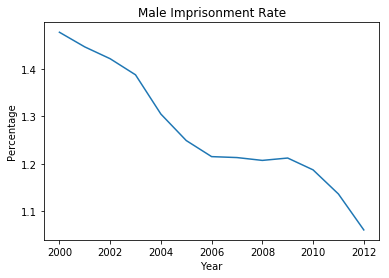

In [8]:
plt.plot(impdatadf_male.Year,impdatadf_male.Percentage)
plt.title("Male Imprisonment Rate")
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

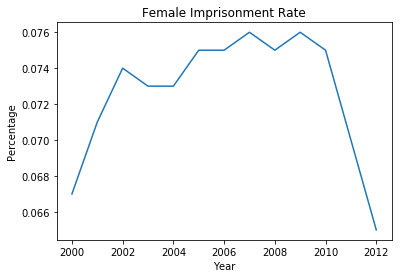

In [18]:
plt.plot(impdatadf_female.Year,impdatadf_female.Percentage)
plt.title('Female Imprisonment Rate')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show